In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

df = pd.read_csv("retail_store_inventory.csv")


df = df.dropna()

print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape: (73100, 15)

Column Names: ['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing', 'Seasonality']

First 5 Rows:
          Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [ ]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Demand Class', 'Discounted Price',
       'Price Difference', 'Stock to Order Ratio', 'Forecast Accuracy'],
      dtype='object')

In [ ]:
print(df.columns)


Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')


In [ ]:
missing_cols = [col for col in feature_cols if col not in df.columns]
print("Missing columns:", missing_cols)


Missing columns: ['Year', 'Month', 'Day']


In [ ]:
# 📆 Step 2: Convert Date column and extract time-based features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day



# 🧮 Step 4: Feature Engineering
df['Discounted Price'] = df['Price'] * (1 - df['Discount'] / 100)
df['Price Difference'] = df['Price'] - df['Competitor Pricing']
df['Stock to Order Ratio'] = df['Inventory Level'] / (df['Units Ordered'] + 1)
df['Forecast Accuracy'] = abs(df['Demand Forecast'] - df['Units Sold']) / (df['Units Sold'] + 1)

# 🧠 Step 5: Target Creation - Classification
def classify_units(units):
    if units <= 50:
        return 0  # Low
    elif units <= 150:
        return 1  # Medium
    else:
        return 2  # High

df['Demand Class'] = df['Units Sold'].apply(classify_units)

# ✅ Step 6: Feature Selection
feature_cols = [
    'Price', 'Discount', 'Demand Forecast', 'Competitor Pricing',
    'Discounted Price', 'Price Difference', 'Stock to Order Ratio',
    'Forecast Accuracy', 'Holiday/Promotion', 'Year', 'Month', 'Day'
] + [col for col in df.columns if 'Category_' in col or 'Region_' in col or
      'Weather Condition_' in col or 'Seasonality_' in col]

X = df[feature_cols]
y = df['Demand Class']
X,y

(       Price  Discount  Demand Forecast  Competitor Pricing  Discounted Price  \
 0      33.50        20           135.47               29.69            26.800   
 1      63.01        20           144.04               66.16            50.408   
 2      27.99        10            74.02               31.32            25.191   
 3      32.72        10            62.18               34.74            29.448   
 4      73.64         0             9.26               68.95            73.640   
 ...      ...       ...              ...                 ...               ...   
 73095  73.73        20            18.46               72.45            58.984   
 73096  82.57        10            48.43               83.78            74.313   
 73097  11.11        10            39.65               10.91             9.999   
 73098  53.14        20           270.52               55.80            42.512   
 73099  78.39        20             2.33               79.52            62.712   
 
        Price 

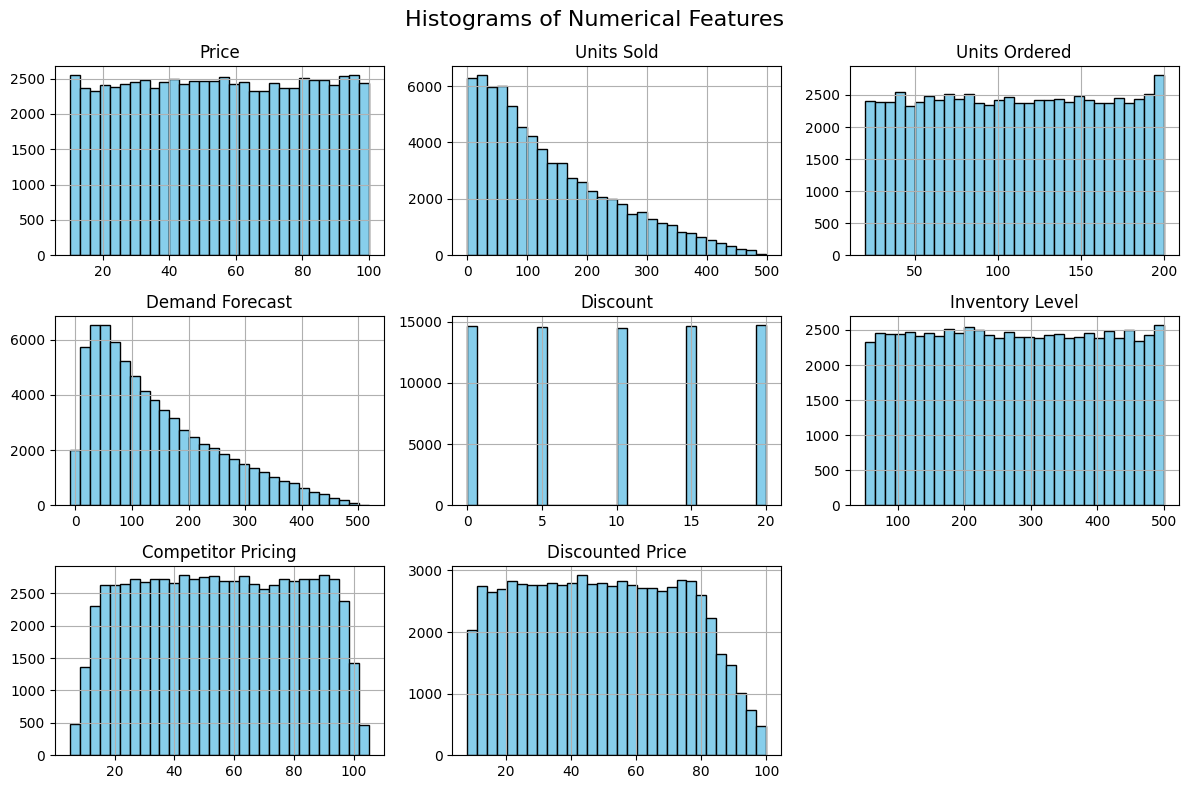

In [ ]:
# Plot histograms of all numerical features
numerical_cols = ['Price', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Discount',
                  'Inventory Level', 'Competitor Pricing', 'Discounted Price']

df[numerical_cols].hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


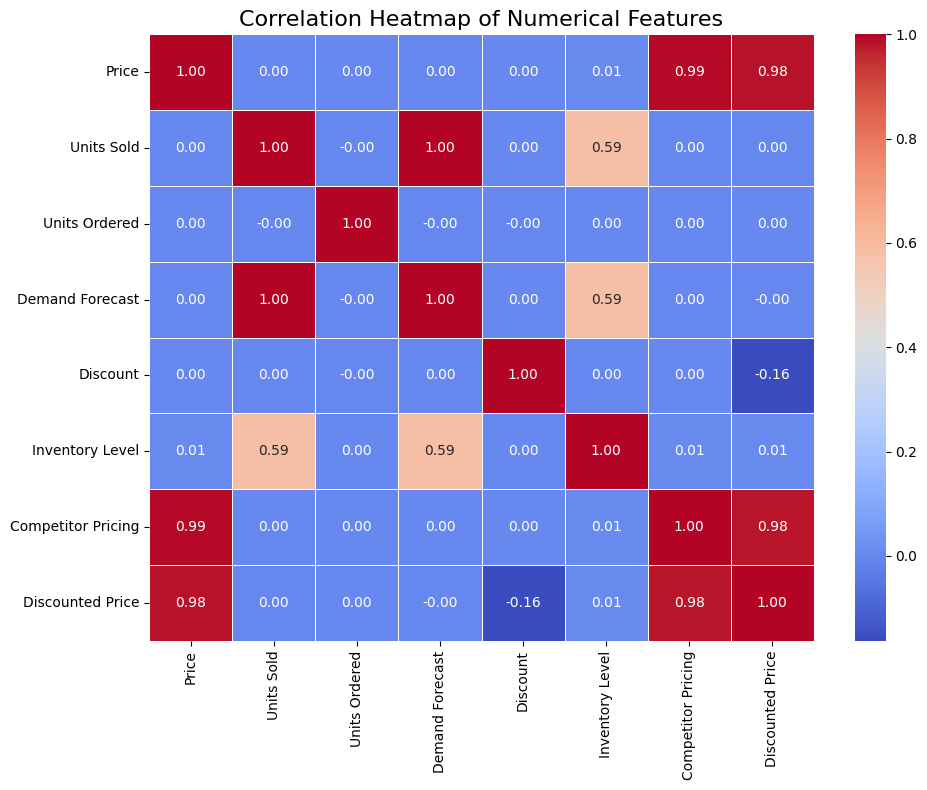

In [ ]:
# Correlation heatmap for numerical columns
import seaborn as sns

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


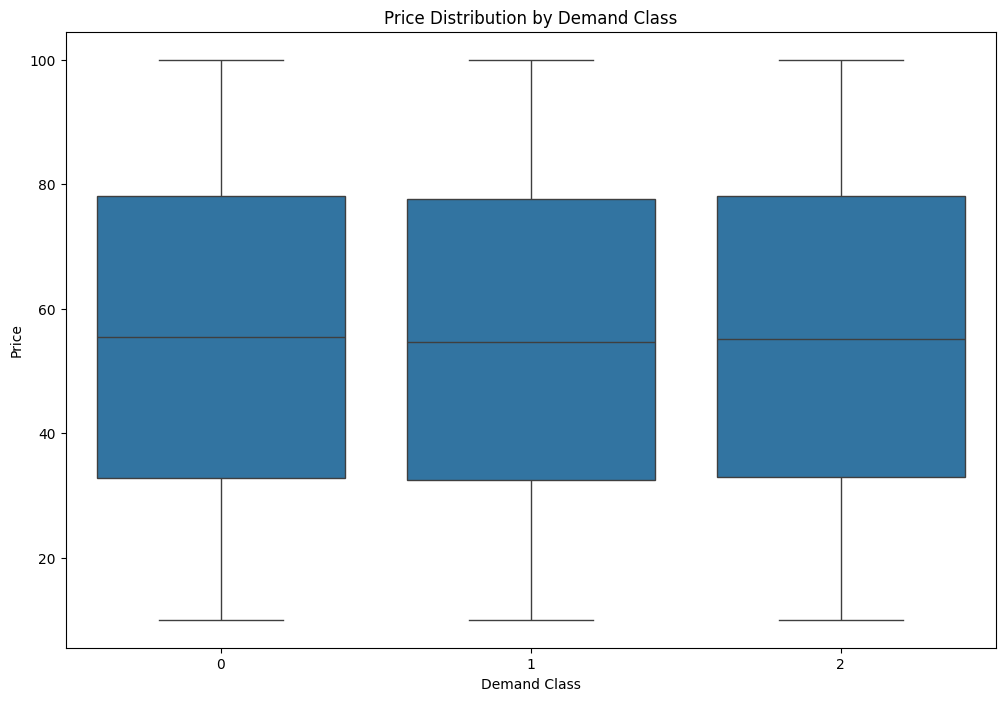

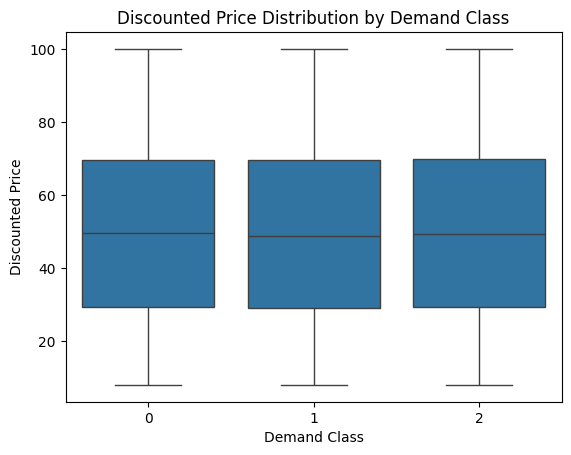

In [ ]:
# Box plots to show the relationship between numerical features and the target 'Demand Class'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Demand Class', y='Price', data=df)
plt.title('Price Distribution by Demand Class')
plt.show()

# Same for other features
sns.boxplot(x='Demand Class', y='Discounted Price', data=df)
plt.title('Discounted Price Distribution by Demand Class')
plt.show()


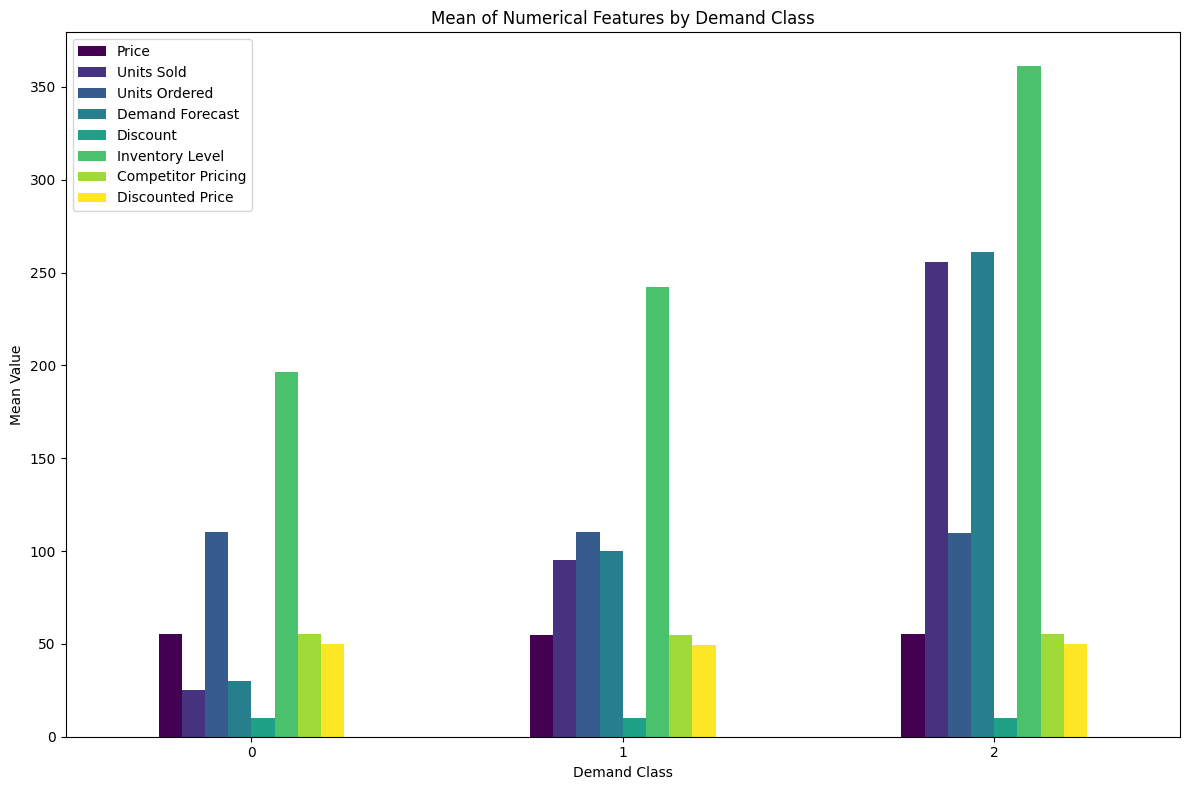

In [ ]:
# Group by Demand Class and calculate mean for each feature
df_grouped = df.groupby('Demand Class')[numerical_cols].mean()

# Visualize the distribution of numerical features by Demand Class
df_grouped.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Mean of Numerical Features by Demand Class')
plt.ylabel('Mean Value')
plt.xlabel('Demand Class')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



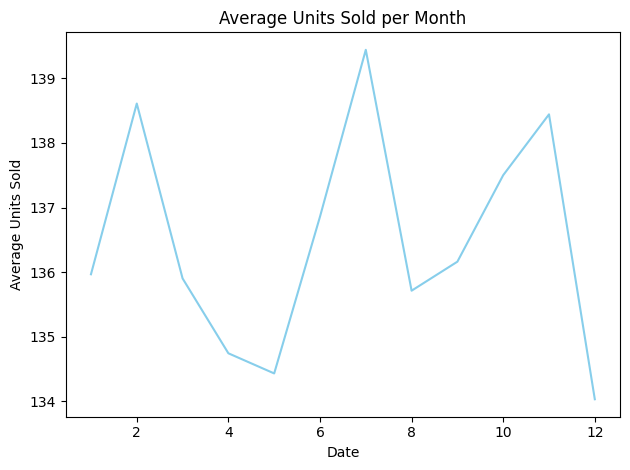

In [ ]:
# Convert 'Date' column to datetime format (if it's not already)
df['Date'] = pd.to_datetime(df['Date'])

# Plotting trends over time for some numerical features
df.groupby(df['Date'].dt.month)['Units Sold'].mean().plot(kind='line', color='skyblue')
plt.title('Average Units Sold per Month')
plt.ylabel('Average Units Sold')
plt.tight_layout()
plt.show()


Number of outliers in the dataset: Price                   0
Units Sold            236
Units Ordered           0
Demand Forecast       241
Discount                0
Inventory Level         0
Competitor Pricing      0
Discounted Price        0
dtype: int64


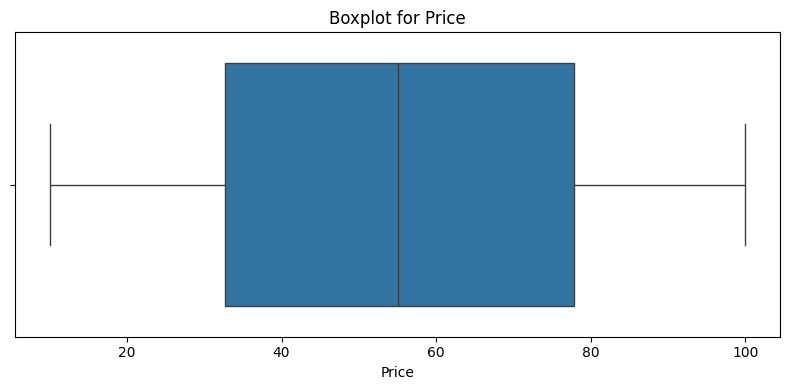

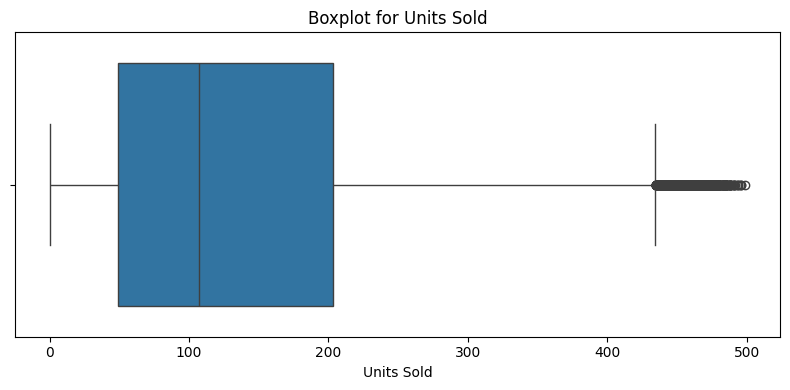

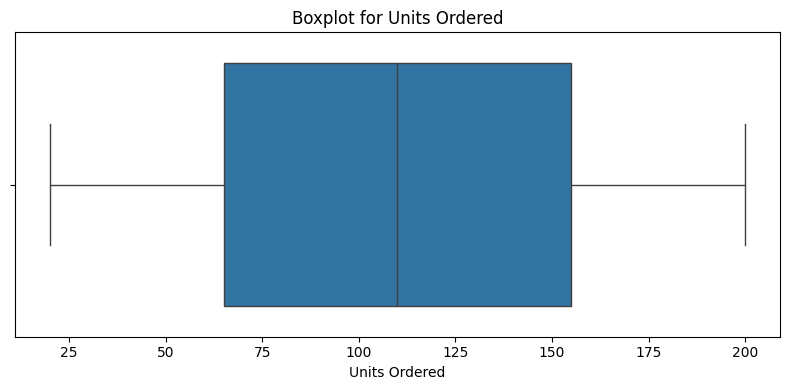

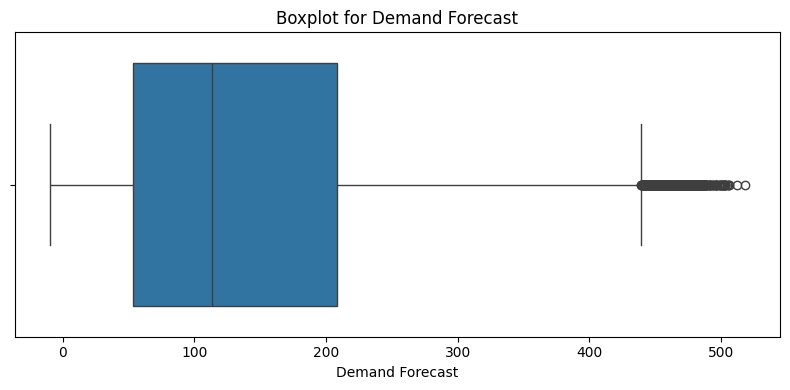

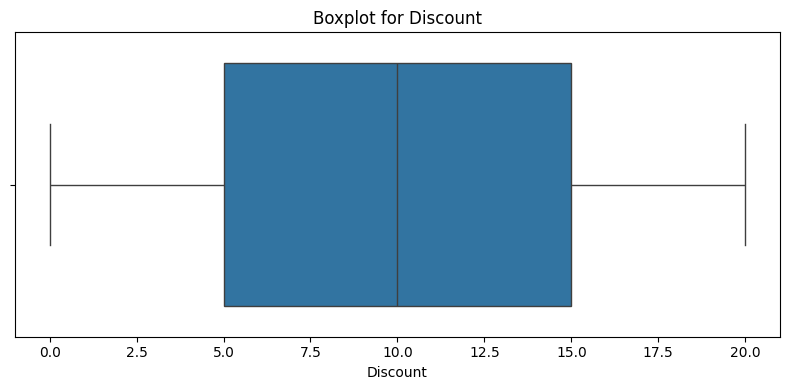

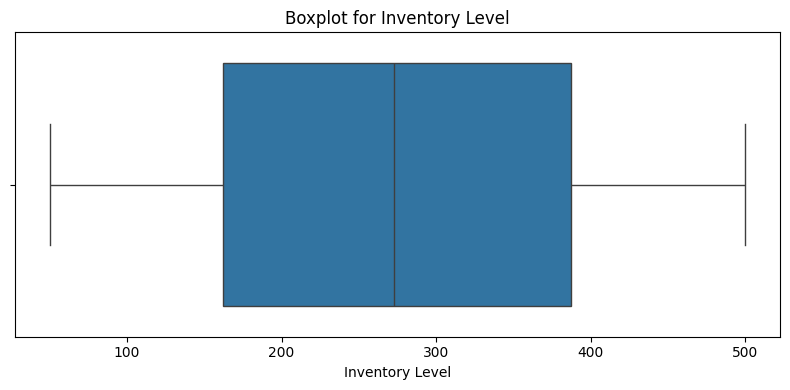

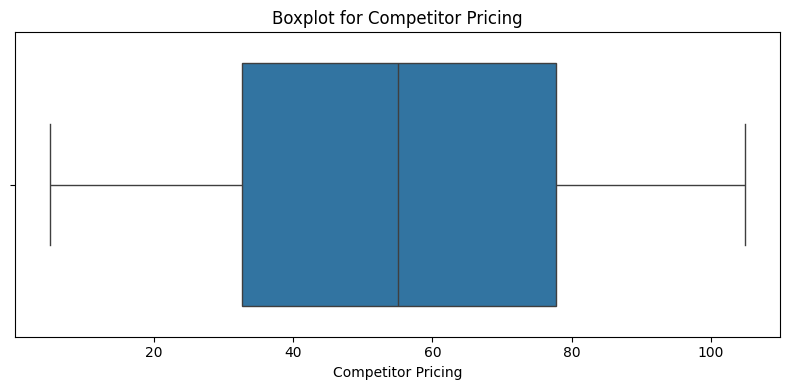

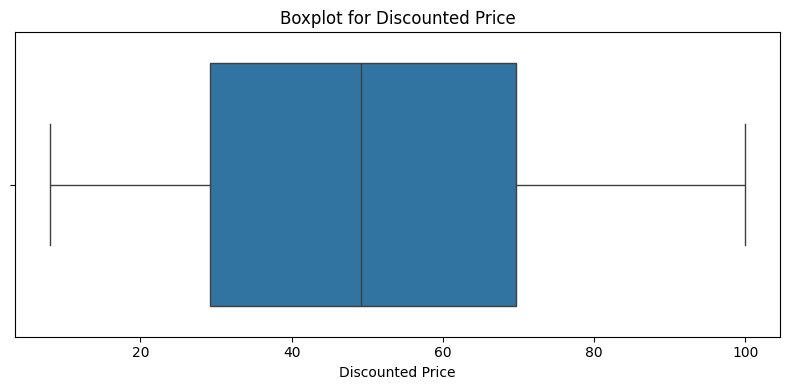

In [ ]:
from scipy import stats

# Calculate z-scores for numerical columns to detect outliers
z_scores = stats.zscore(df[numerical_cols])
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3)  # Consider values with z-score > 3 as outliers

print(f'Number of outliers in the dataset: {outliers.sum()}')

# Plot boxplots for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()


In [ ]:
df = df[(df['Units Sold'] < 140) & (df['Price'] > 10)]
df

,Date,Store ID,Product ID,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,...,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,Year,Month,Day,Price Difference,Forecast Accuracy
0,2022-01-01,S001,P0001,231,127,55,135.47,33.50,20,0,...,False,False,False,False,False,2022,1,1,3.81,0.066172
2,2022-01-01,S001,P0003,102,65,51,74.02,27.99,10,1,...,False,True,False,True,False,2022,1,1,-3.33,0.136667
3,2022-01-01,S001,P0004,469,61,164,62.18,32.72,10,1,...,False,False,False,False,False,2022,1,1,-2.02,0.019032
4,2022-01-01,S001,P0005,166,14,135,9.26,73.64,0,0,...,False,True,False,True,False,2022,1,1,4.69,0.316000
5,2022-01-01,S001,P0006,138,128,102,139.82,76.83,10,1,...,False,True,False,False,True,2022,1,1,-2.52,0.091628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73090,2024-01-01,S005,P0011,156,121,156,137.12,86.09,0,1,...,True,False,False,True,False,2024,1,1,-1.74,0.132131
73095,2024-01-01,S005,P0016,96,8,127,18.46,73.73,20,0,...,True,False,False,False,True,2024,1,1,1.28,1.162222
73096,2024-01-01,S005,P0017,313,51,101,48.43,82.57,10,0,...,False,False,False,False,False,2024,1,1,-1.21,0.049423
73097,2024-01-01,S005,P0018,278,36,151,39.65,11.11,10,0,...,False,False,False,False,True,2024,1,1,0.20,0.098649


In [ ]:
X = df[feature_cols]
X

,Price,Discount,Demand Forecast,Competitor Pricing,Discounted Price,Price Difference,Stock to Order Ratio,Forecast Accuracy,Holiday/Promotion,Year,Month,Day,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,33.50,20,135.47,29.69,26.800,3.81,4.125000,0.066172,0,2022,1,1,False,False,False
1,63.01,20,144.04,66.16,50.408,-3.15,3.044776,0.039470,0,2022,1,1,False,False,False
2,27.99,10,74.02,31.32,25.191,-3.33,1.961538,0.136667,1,2022,1,1,False,True,False
3,32.72,10,62.18,34.74,29.448,-2.02,2.842424,0.019032,1,2022,1,1,False,False,False
4,73.64,0,9.26,68.95,73.640,4.69,1.220588,0.316000,0,2022,1,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,73.73,20,18.46,72.45,58.984,1.28,0.750000,1.162222,0,2024,1,1,False,False,True
73096,82.57,10,48.43,83.78,74.313,-1.21,3.068627,0.049423,0,2024,1,1,False,False,False
73097,11.11,10,39.65,10.91,9.999,0.20,1.828947,0.098649,0,2024,1,1,False,False,True
73098,53.14,20,270.52,55.80,42.512,-2.66,17.000000,0.024604,0,2024,1,1,True,False,False


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 🧹 Step 1: Define Feature Groups
# -------------------------------

# Define numerical columns based on your dataset
numerical_cols = ['Price', 'Discount', 'Demand Forecast', 'Competitor Pricing',
                  'Discounted Price', 'Stock to Order Ratio', 'Inventory Level',
                  'Units Ordered']  # Add 'Is High Season' only if it exists

# Dynamically fetch one-hot encoded categorical columns
categorical_cols = [col for col in df.columns if
                    'Category_' in col or
                    'Region_' in col or
                    'Weather Condition_' in col or
                    'Seasonality_' in col]

# ------------------------------------
# 🧼 Step 2: Drop Target & Non-Features
# ------------------------------------

# Drop target and time-related columns, if they exist
drop_cols = [col for col in ['Units Sold', 'Year', 'Date'] if col in df.columns]
features = df.drop(columns=drop_cols)
target = df['Units Sold'].values  # Your prediction target

# ------------------------------------
# ✂️ Step 3: Train-Test Split
# ------------------------------------

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.05, random_state=22)

# ------------------------------------
# 📏 Step 4: Scale Numerical Features
# ------------------------------------

# Initialize the scaler
scaler = StandardScaler()

# Select only the numerical columns from train/val sets
X_train_num = X_train[numerical_cols]
X_val_num = X_val[numerical_cols]

# Fit and transform on training data, transform on validation
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)

# Convert scaled arrays back to DataFrames (preserve column names + indices)
X_train_scaled = pd.DataFrame(X_train_num_scaled, columns=numerical_cols, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_num_scaled, columns=numerical_cols, index=X_val.index)

# ------------------------------------
# 🧩 Step 5: Combine with Categorical
# ------------------------------------

# Select categorical columns (already one-hot encoded)
X_train_cat = X_train[categorical_cols]
X_val_cat = X_val[categorical_cols]

# Concatenate numerical (scaled) and categorical (unchanged)
X_train_final = pd.concat([X_train_scaled, X_train_cat], axis=1)
X_val_final = pd.concat([X_val_scaled, X_val_cat], axis=1)

# ✅ Done! Final datasets ready for modeling
print("🔍 Preview of Final Processed Train Set:")
print(X_train_final.head())

print("\n🔍 Preview of Final Processed Validation Set:")
print(X_val_final.head())


🔍 Preview of Final Processed Train Set:
          Price  Discount  Demand Forecast  Competitor Pricing  \
11738  0.232999 -1.412975        -0.190549            0.089389   
57035  0.121948 -0.706884        -1.022458            0.296320   
67816  1.109105 -0.000793        -0.937235            1.194293   
50147  1.504889 -0.706884        -0.737863            1.314557   
60580  0.308313 -0.706884        -1.142741            0.185218   

       Discounted Price  Stock to Order Ratio  Inventory Level  Units Ordered  \
11738          0.486687              0.735953        -0.142410      -1.282901   
57035          0.242764             -0.957575        -1.658380       0.764069   
67816          1.091528             -0.215411        -1.558341      -1.627251   
50147          1.679061             -0.401349        -0.858071      -0.689853   
60580          0.436319              3.493358         1.158091      -1.569859   

       Seasonality_Spring  Seasonality_Summer  Seasonality_Winter  
11738   

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Lasso Regression", Lasso(alpha=0.1)),
    ("Ridge Regression", Ridge(alpha=1.0))
]

# Train and evaluate each model
for name, model in models:
    print(f'Training {name}...')

    # Fit the model
    model.fit(X_train_scaled, Y_train)

    # Predictions on training data
    train_preds = model.predict(X_train_scaled)
    train_error = mae(Y_train, train_preds)
    print(f'Training Error (MAE): {train_error:.4f}')

    # Predictions on validation data
    val_preds = model.predict(X_val_scaled)
    val_error = mae(Y_val, val_preds)
    print(f'Validation Error (MAE): {val_error:.4f}')
    print()

Training Linear Regression...
Training Error (MAE): 7.4563
Validation Error (MAE): 7.3988

Training Decision Tree...
Training Error (MAE): 0.0000
Validation Error (MAE): 9.5715

Training Random Forest...
Training Error (MAE): 2.7111
Validation Error (MAE): 7.3165

Training Lasso Regression...
Training Error (MAE): 7.4557
Validation Error (MAE): 7.3969

Training Ridge Regression...
Training Error (MAE): 7.4562
Validation Error (MAE): 7.3987

